In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.externals import joblib

In [2]:
"""Attributes:

Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

"""

'Attributes:\n\nDataset information:\n\nThis dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\nSeveral constraints were placed on the selection of these instances from a larger database. \nIn particular, all patients here are females at least 21 years old of Pima Indian heritage.\n\n\nPregnancies: Number of times pregnant\n\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\n\nBloodPressure: Diastolic blood pressure (mm Hg)\n\nSkinThickness: Triceps skin fold thickness (mm)\n\nInsulin: 2-Hour serum insulin (mu U/ml)\n\nBMI: Body mass index (weight in kg/(height in m)^2)\n\nDiabetesPedigreeFunction: Diabetes pedigree function\n\nAge: Age (years)\n\nOutcome: Class variable (0 or 1)\n\n'

In [3]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

ValueError: Arrays were different lengths: 9 vs 0

In [8]:
#Total 768 patients record
#Using 650 data for training
# Using 100 data for testing
#Using 18 data for checking

dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [9]:
#Separating label and features and converting to numpy array to feed into our model
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [10]:
# Normalize the data 
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

# means = np.mean(trainData, axis=0)
# stds = np.std(trainData, axis=0)

In [11]:
#Now , we will use the our training data to 
#create a bayesian classifier.

diabetesCheck = SVC()
diabetesCheck.fit(trainData, trainLabel)

#After we train our bayesian classifier , 
#we test how well it works using our test data.
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

('accuracy = ', 75.0, '%')


In [12]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData,trainLabel)
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

('accuracy = ', 78.0, '%')


In [13]:
coeff = list(diabetesCheck.coef_[0])
coeff

[0.44287472197602284,
 1.0527740518051887,
 -0.24221676495456743,
 -0.0062885138719461957,
 -0.10299836235634571,
 0.76213898014995785,
 0.34898508475085921,
 0.12222510487561297]

In [14]:
labels = list(dfTrain.drop('Outcome',1).columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5,0,u'Importance')

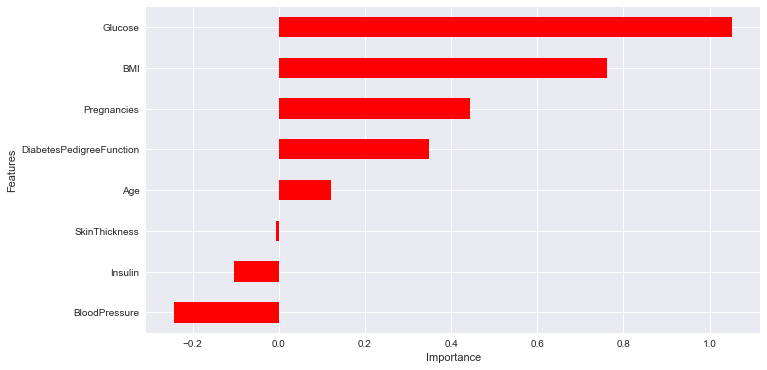

In [15]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [16]:
#model saving and loading
joblib.dump(diabetesCheck, 'diabeteseModel.pkl')
diabetesLoadedModel = joblib.load('diabeteseModel.pkl')

In [17]:
#testing loaded model to make prediction
accuracyModel = diabetesLoadedModel.score(testData,testLabel)
print("accuracy = ",accuracyModel * 100,"%")

('accuracy = ', 78.0, '%')


In [18]:
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1


In [19]:
sampleData = dfCheck[:1]
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures

array([[   4.   ,  136.   ,   70.   ,    0.   ,    0.   ,   31.2  ,
           1.182,   22.   ]])

In [20]:
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
predictionProbab = diabetesLoadedModel.predict_proba(sampleDataFeatures)

In [21]:
prediction

array([1])